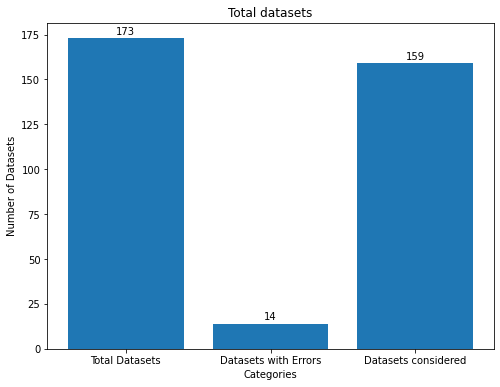

In [24]:
import matplotlib.pyplot as plt

good_datasets = 159
datasets_with_errors = 14
total_datasets = good_datasets + datasets_with_errors

# Data for the bar plot
categories = ['Total Datasets', 'Datasets with Errors', 'Datasets considered']
values = [total_datasets, datasets_with_errors, good_datasets]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Number of Datasets')
plt.title('Total datasets')

#Adding custom xticks
plt.xticks(categories, categories)  # Set the xticks to be the categories list

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.show()

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Datasets.csv")
df.columns

Index(['Dataset', 'Domain', 'Bigdata', 'Merge (train, test, validation)',
       'Seperate label file', 'File conversion', 'Additional files',
       'Multiple sheets', 'Missing data', 'Zip', 'Label', 'Preprocessing',
       'Multiple files', 'Type of Preprocessing', 'Multiple Data files',
       'Dataset characteristics', 'ML', 'On server', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

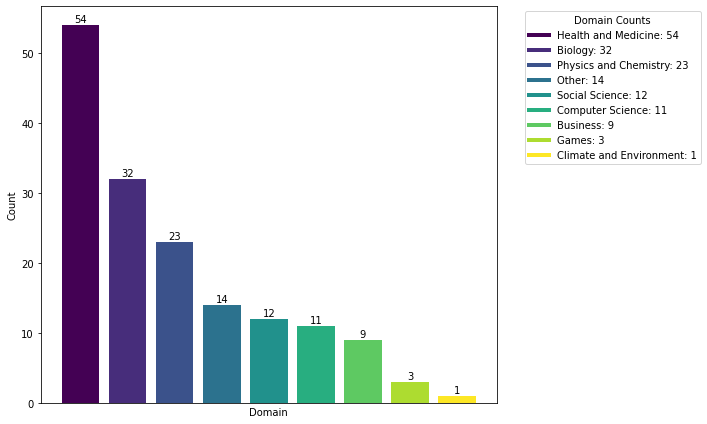

In [25]:
import numpy as np

domain_counts = df['Domain'].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(domain_counts)))

plt.figure(figsize=(10, 6))
bars = plt.bar(domain_counts.index, domain_counts.values, color=colors)
plt.xlabel('Domain')
plt.ylabel('Count')

legend_labels = [f"{domain}: {count}" for domain, count in zip(domain_counts.index, domain_counts.values)]
legend_colors = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_colors, legend_labels, title="Domain Counts", bbox_to_anchor=(1.05, 1), loc='upper left')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.xticks([])

plt.tight_layout()
plt.show()

## Additinoal graphs

In [20]:
replace_map = {'yes': 'No', 'no': 'Yes', 'Yes':'No','No':'Yes'}
df = pd.read_csv("KnowledgeBase.csv")
df['Completeness_bins'] = df['Completeness_bins'].map(replace_map)
#df['Conciseness_bins'] = df['Conciseness_bins'].map(replace_map)
#df['ClassImbRatio_bins'] = df['ClassImbRatio_bins'].map(replace_map)
#df['OutlierPerc_bins'] = df['OutlierPerc_bins'].map(replace_map)
#df['ClassOverlapPerc_bins'] = df['ClassOverlapPerc_bins'].map(replace_map)
#df['LabelIssues_bins'] = df['LabelIssues_bins'].map(replace_map)

In [21]:
df.to_csv("KnowledgeBase.csv",index=False)

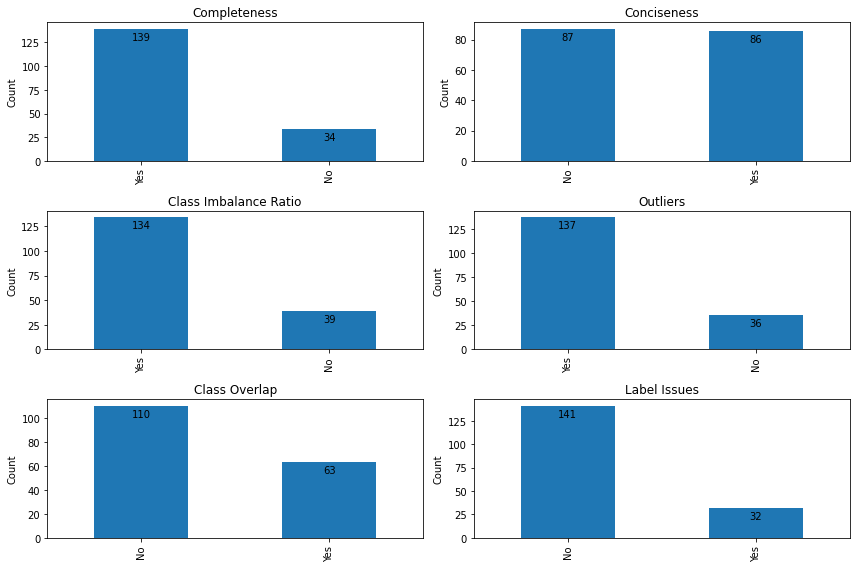

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("KnowledgeBase.csv")

bin_df_plot = df[['Completeness_bins', 'Conciseness_bins','ClassImbRatio_bins', 'OutlierPerc_bins', 'ClassOverlapPerc_bins','LabelIssues_bins']]


bin_df_plot = bin_df_plot.rename(columns={
    'Completeness_bins': 'Completeness',
    'Conciseness_bins': 'Conciseness',
    'ClassImbRatio_bins': 'Class Imbalance Ratio',
    'OutlierPerc_bins' : 'Outliers',
    'ClassOverlapPerc_bins': 'Class Overlap',
    'LabelIssues_bins' : 'Label Issues'
})

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8), nrows=3, ncols=2)
x = y = 0

for column in bin_df_plot:
    bin_counts = bin_df_plot[column].value_counts()
    bin_counts.plot(ax=ax[x, y], kind='bar')
    ax[x, y].set_ylabel('Count')
    ax[x, y].set_title(f'{column}')
   # Add count labels on each bar
    for i, v in enumerate(bin_counts):
        ax[x, y].text(i, v - 0.1 * max(bin_counts), str(v), ha='center',va='bottom')
    
    y += 1
    if y == 2:
        x += 1
        y = 0

plt.tight_layout()
plt.show()

In [28]:
df = pd.read_csv("KnowledgeBase.csv")

df['LabelIssuesPerc'] = df['LabelIssues'].apply(len) / df['nr_inst']
df.to_csv("KnowledgeBase.csv", index=False)

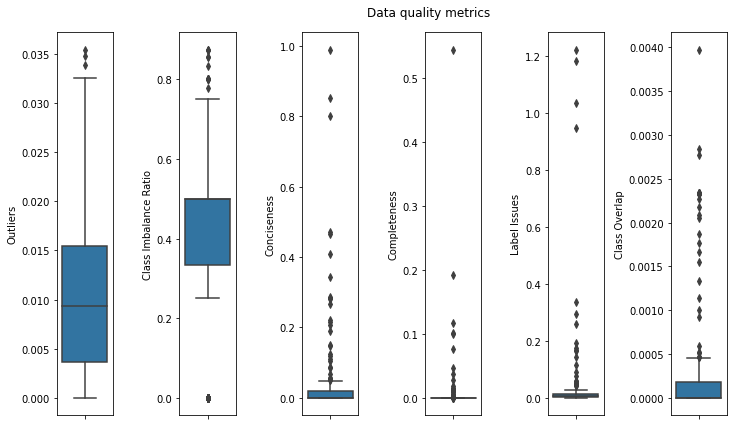

In [32]:
import seaborn as sns

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 7)
fig.suptitle("Data quality metrics")

bin_df_plot = df[['Completeness', 'Conciseness','ClassImbRatio', 'ClassOverlapPerc', 'OutlierPerc','LabelIssuesPerc']]

bin_df_plot = bin_df_plot.rename(columns={
    'Completeness': 'Completeness',
    'Conciseness': 'Conciseness',
    'ClassImbRatio': 'Class Imbalance Ratio',
    'OutlierPerc' : 'Outliers',
    'ClassOverlapPerc': 'Class Overlap',
    'LabelIssuesPerc' : 'Label Issues'
})

ax = fig.add_subplot(gs[0, 0])
sns.boxplot(y='Outliers', data=bin_df_plot)

ax = fig.add_subplot(gs[0, 1])
sns.boxplot(y='Class Imbalance Ratio', data=bin_df_plot)

ax = fig.add_subplot(gs[0, 2])
sns.boxplot(y='Conciseness', data=bin_df_plot)

ax = fig.add_subplot(gs[0, 3])
sns.boxplot(y='Completeness', data=bin_df_plot)


ax = fig.add_subplot(gs[0, 4])
sns.boxplot(y='Label Issues', data=bin_df_plot)

ax = fig.add_subplot(gs[0, 5])
sns.boxplot(y='Class Overlap', data=bin_df_plot)

fig.tight_layout()
plt.show()

<AxesSubplot:>

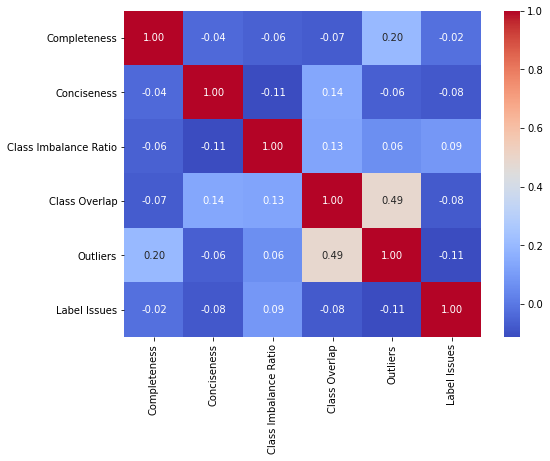

In [36]:
from pandas.plotting import scatter_matrix

bin_df_plot = df[['Completeness', 'Conciseness','ClassImbRatio', 'ClassOverlapPerc', 'OutlierPerc','LabelIssuesPerc']]

bin_df_plot = bin_df_plot.rename(columns={
    'Completeness': 'Completeness',
    'Conciseness': 'Conciseness',
    'ClassImbRatio': 'Class Imbalance Ratio',
    'OutlierPerc' : 'Outliers',
    'ClassOverlapPerc': 'Class Overlap',
    'LabelIssuesPerc' : 'Label Issues'
})


corr_matrix = bin_df_plot.corr()#.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")

In [30]:
import pandas as pd
import numpy as np

# Create a dictionary with the provided data
data = {
    "File": ["iris0.csv"] * 9,
    "FeatureAlgo": ["GR", "fcbf", "relieff", "chisquare", "cfs", "multisurf", "MI", "mrmr", "relief"],
    "Accuracy": [1] * 9,
    "Time FS": [0.00263334200281, 0.003215058000933, 0.22754522300238, 0.008833170999424, 0.005771924996225, 2.78998185900127, 0.010544750999543, 106.555689962996, 0.006409708999854],
    "Features": [2, 2, 2, 2, 2, 2, 2, 2, 1]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

In [34]:
# Recalculate EARR with alpha = 0.1 and beta = 0
alpha = 0.1
beta = 0.1

earr_scores_alpha1_beta0 = []
for i in range(df.shape[0]):
    earr_sum = 0
    for j in range(n):
        if i != j:
            time_ratio = max(0, np.log(df.loc[i, 'Time FS'] / df.loc[j, 'Time FS']))
            feat_ratio = max(0, np.log(df.loc[i, 'Features'] / df.loc[j, 'Features']))
            denom = 1 + alpha * time_ratio + beta * feat_ratio
            score = 1 / denom
            #print(i,j,score)
            earr_sum += score
    earr_avg = earr_sum / (n - 1)
    earr_scores_alpha1_beta0.append(earr_avg)

df['EARR (α=0.1, β=0)'] = earr_scores_alpha1_beta0
df_sorted_alpha1_beta0 = df.sort_values(by='EARR (α=0.1, β=0)', ascending=False)

df_sorted_alpha1_beta0[['FeatureAlgo', 'EARR (α=0.1, β=0)']]

#print(df_sorted_alpha1_beta0)

,FeatureAlgo,"EARR (α=0.1, β=0)"
0,GR,0.991897
1,fcbf,0.989451
8,relief,0.980424
4,cfs,0.975892
3,chisquare,0.958423
6,MI,0.948917
2,relieff,0.793139
5,multisurf,0.684556
7,mrmr,0.544702


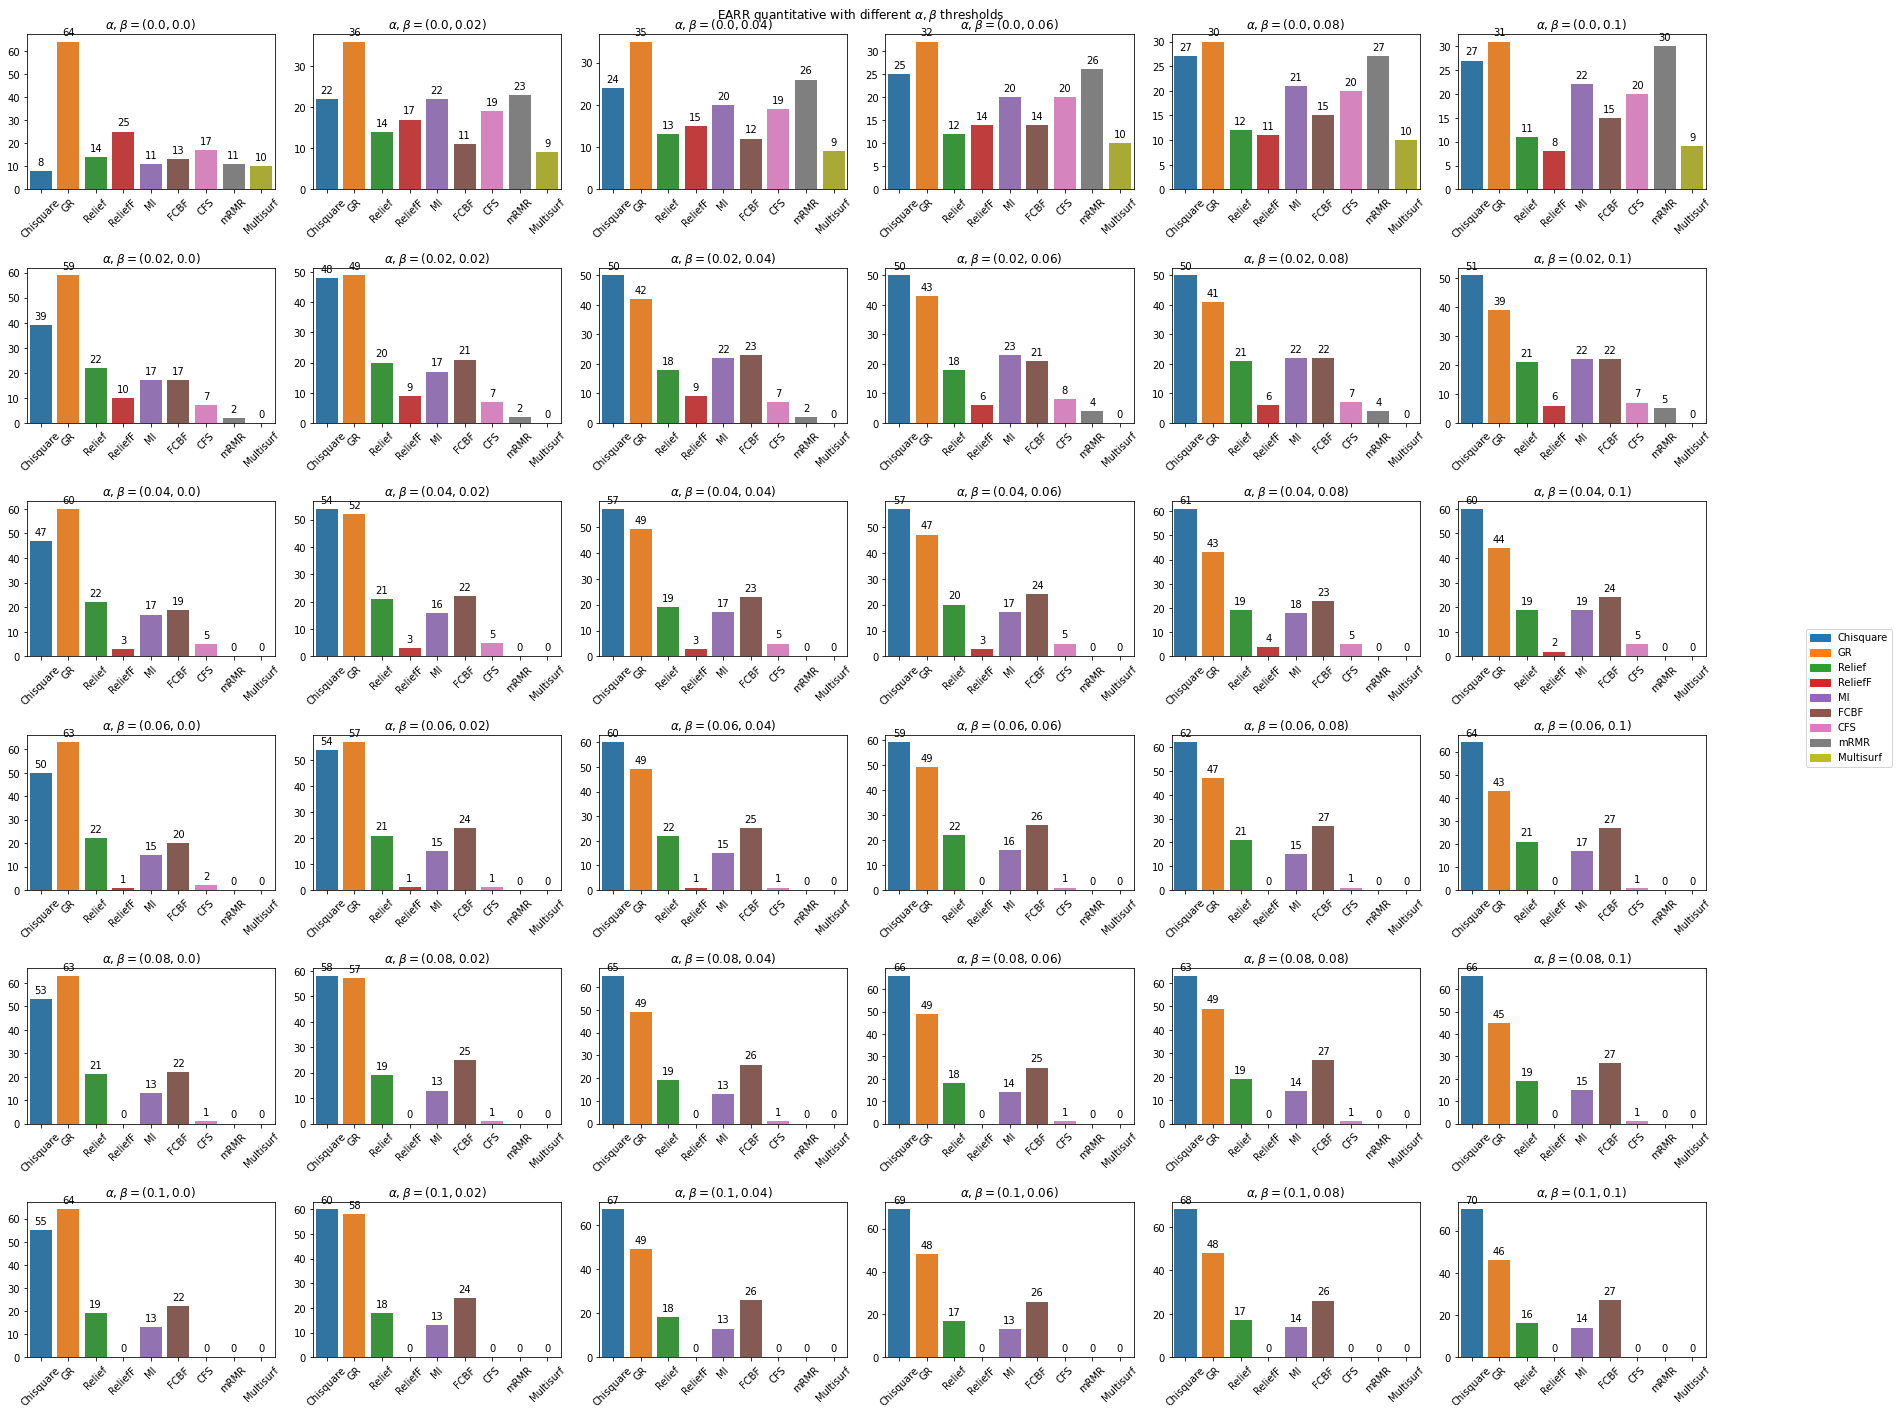

Sorted by alpha, then beta:
   alpha  beta  Chisquare  GR  Relief  ReliefF  MI  FCBF  CFS  mRMR  Multisurf
0    0.0  0.00          8  64      14       25  11    13   17    11         10
1    0.0  0.02         22  36      14       17  22    11   19    23          9
2    0.0  0.04         24  35      13       15  20    12   19    26          9
3    0.0  0.06         25  32      12       14  20    14   20    26         10
4    0.0  0.08         27  30      12       11  21    15   20    27         10
Sorted by beta, then alpha:
    alpha  beta  Chisquare  GR  Relief  ReliefF  MI  FCBF  CFS  mRMR  \
0    0.00   0.0          8  64      14       25  11    13   17    11   
6    0.02   0.0         39  59      22       10  17    17    7     2   
12   0.04   0.0         47  60      22        3  17    19    5     0   
18   0.06   0.0         50  63      22        1  15    20    2     0   
24   0.08   0.0         53  63      21        0  13    22    1     0   

    Multisurf  
0          10  
6    

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Define the feature selection algorithms and their renaming
feature_algos = [
    'chisquare', 'GR', 'relief', 'relieff', 'MI',
    'fcbf', 'cfs', 'mrmr', 'multisurf'
]
renamed_algos = [
    'Chisquare', 'GR', 'Relief', 'ReliefF', 'MI',
    'FCBF', 'CFS', 'mRMR', 'Multisurf'
]
rename_dict = dict(zip(feature_algos, renamed_algos))

# Define a consistent color palette for feature selection techniques
palette = sns.color_palette("tab10", len(feature_algos))
color_dict = {renamed_algos[i]: palette[i] for i in range(len(feature_algos))}

# Directory containing files
abs_path = "/home/d19125691/Documents/Experiments/ontologyDCQ/FeatureSelectionRecommendation/optimalalphabeta/dearr_cont"

# Extract alpha and beta values from filenames and sort them
file_info = []
for file in os.listdir(abs_path):
    match = re.findall(r"\d+\.\d+", file)
    if match and len(match) == 2:
        alpha, beta = map(float, match)  # Convert to float
        file_info.append((alpha, beta, file))

# Sort by alpha first, then beta
file_info.sort()

# Prepare figure
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(24, 20), tight_layout=True)
fig.suptitle('EARR quantitative with different ' + r'$\alpha, \beta$' + ' thresholds')

# Data collection for DataFrame
results = []

# Plot each file in sorted order
for idx, (alpha, beta, file) in enumerate(file_info):
    df = pd.read_csv(os.path.join(abs_path, file))
    
    df['FeatureAlgo'] = df['FeatureAlgo'].map(rename_dict)  # Rename the algorithms
    value_counts = df['FeatureAlgo'].value_counts().reindex(renamed_algos, fill_value=0)
    
    # Store results for DataFrame
    results.append([alpha, beta] + value_counts.tolist())
    
    # Determine subplot position
    row, col = divmod(idx, 6)
    ax = axes[row][col]
    
    # Plot bar graph
    sns.barplot(ax=ax, x=value_counts.index, y=value_counts.values, palette=[color_dict[algo] for algo in value_counts.index])
    ax.set_title(r'$\alpha, \beta = ({}, {})$'.format(alpha, beta))
    ax.set_xticklabels(labels=value_counts.index, rotation=45)
    
    # Add value annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.4)

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(renamed_algos))]
labels = renamed_algos
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

# Convert results into a DataFrame
df_results = pd.DataFrame(results, columns=['alpha', 'beta'] + renamed_algos)
print("Sorted by alpha, then beta:")
print(df_results.head())

# Sort by beta first, then alpha
df_results_beta_first = df_results.sort_values(by=['beta', 'alpha'])
print("Sorted by beta, then alpha:")
print(df_results_beta_first.head())

In [13]:
# Convert results into a DataFrame
df_results = pd.DataFrame(results, columns=['alpha', 'beta'] + renamed_algos)
print("Sorted by alpha, then beta:")
print(df_results)

# Sort by beta first, then alpha
df_results_beta_first = df_results.sort_values(by=['beta', 'alpha'])
print("Sorted by beta, then alpha:")
print(df_results_beta_first)

Sorted by alpha, then beta:
    alpha  beta  Chisquare  GR  Relief  ReliefF  MI  FCBF  CFS  mRMR  \
0    0.00  0.00          8  64      14       25  11    13   17    11   
1    0.00  0.02         26  33      13       17  19    13   21    23   
2    0.00  0.04         29  28      13       12  20    11   20    32   
3    0.00  0.06         31  27      16       11  17    13   17    32   
4    0.00  0.08         38  27      15       10  14    12   15    31   
5    0.00  0.10         38  26      16        9  11    13   14    35   
6    0.02  0.00         57  60      17        3  14    20    2     0   
7    0.02  0.02         69  46      16        3  14    24    1     0   
8    0.02  0.04         77  38      18        2  13    23    1     1   
9    0.02  0.06         85  34      15        2  14    20    2     1   
10   0.02  0.08         85  33      16        1  13    22    2     1   
11   0.02  0.10         89  29      17        1  15    18    3     1   
12   0.04  0.00         75  63      

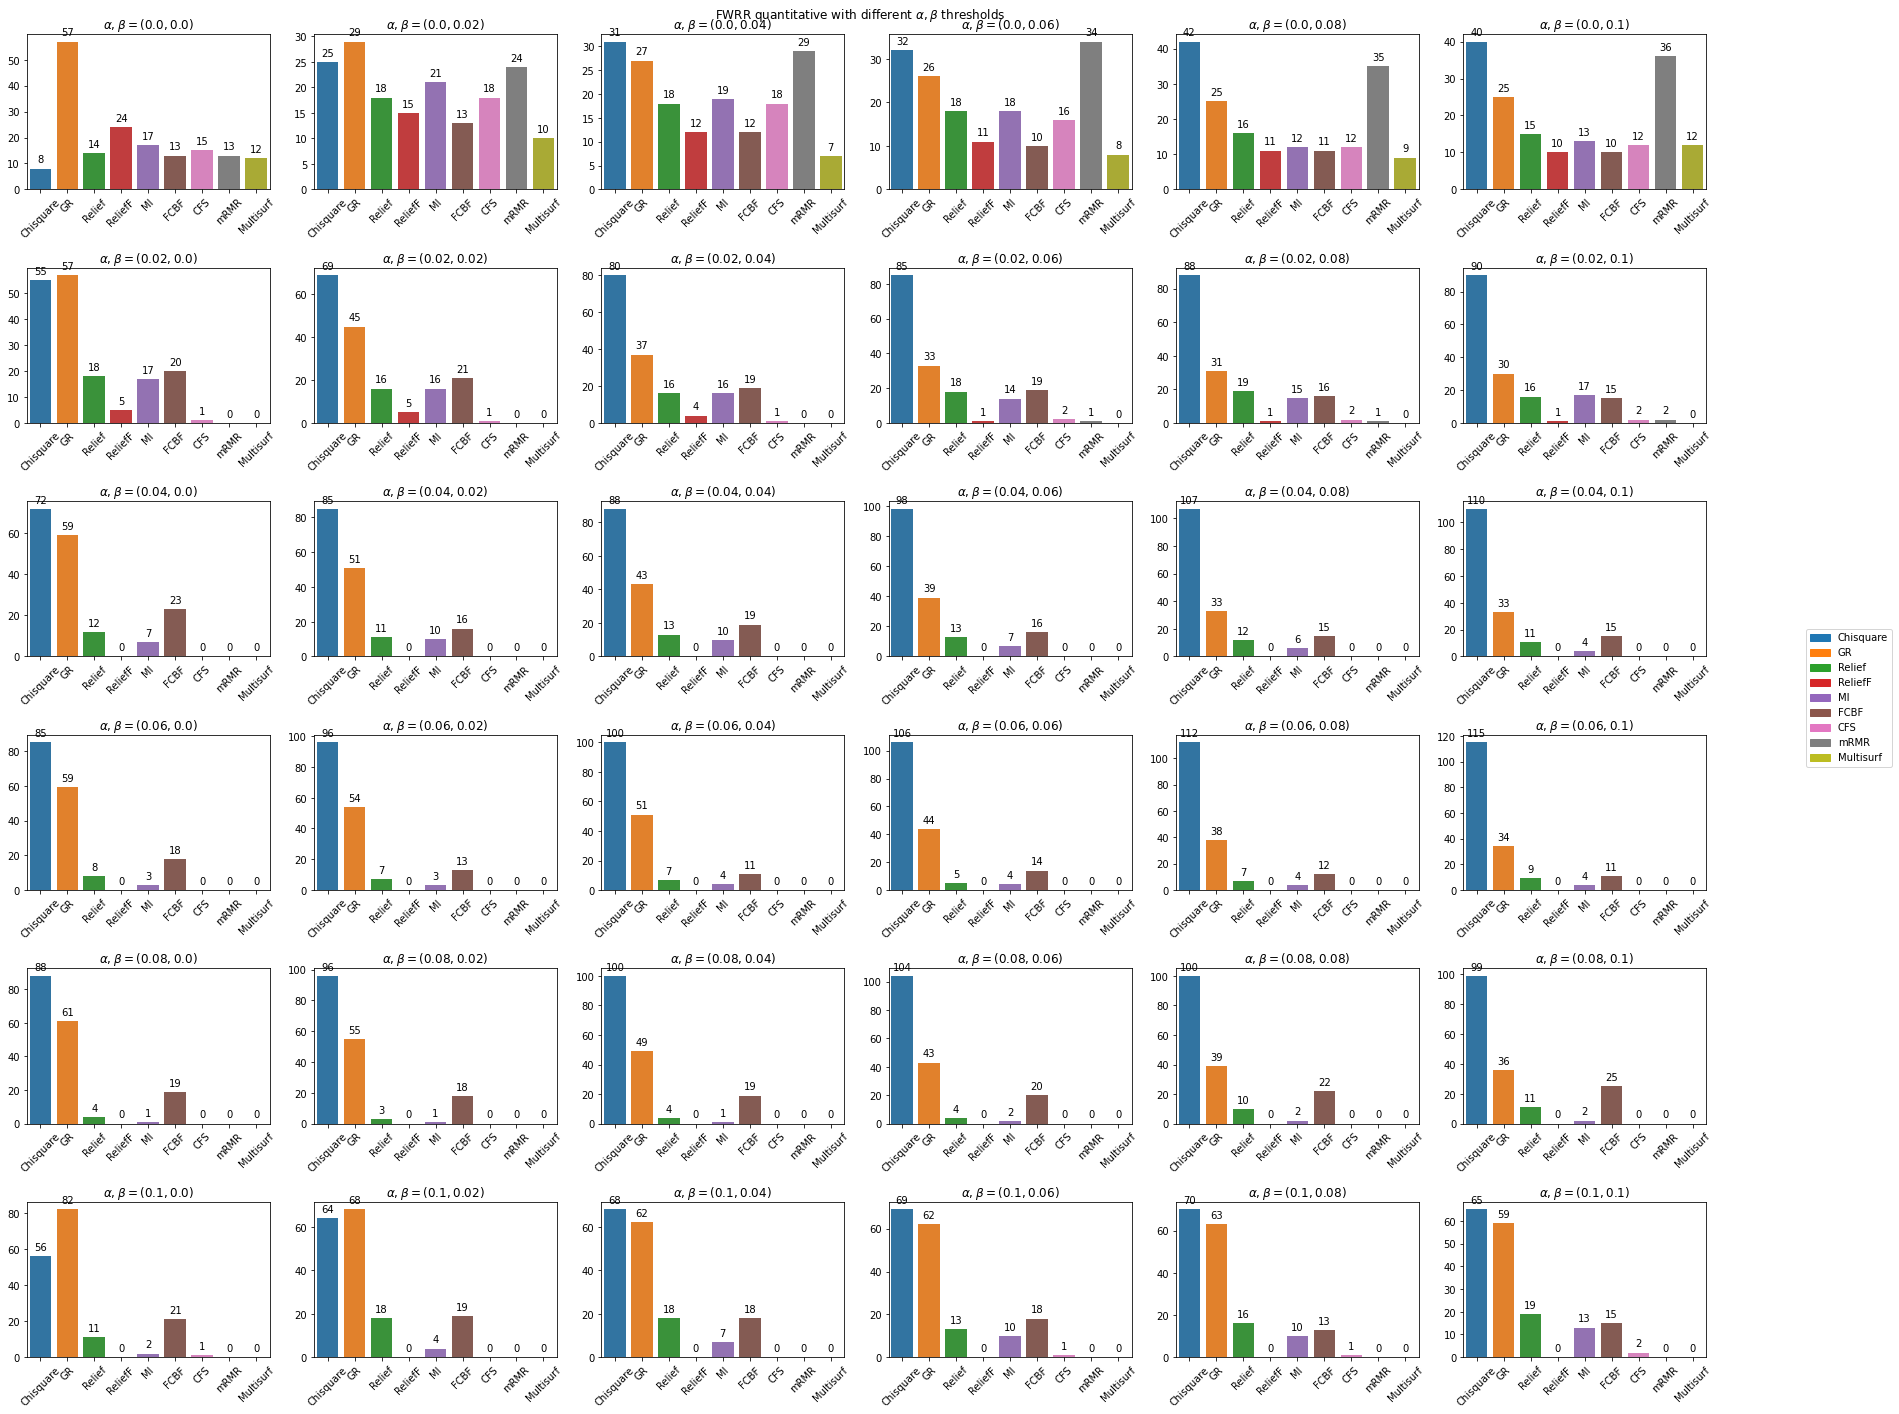

Sorted by alpha, then beta:
   alpha  beta  Chisquare  GR  Relief  ReliefF  MI  FCBF  CFS  mRMR  Multisurf
0    0.0  0.00          8  57      14       24  17    13   15    13         12
1    0.0  0.02         25  29      18       15  21    13   18    24         10
2    0.0  0.04         31  27      18       12  19    12   18    29          7
3    0.0  0.06         32  26      18       11  18    10   16    34          8
4    0.0  0.08         42  25      16       11  12    11   12    35          9
Sorted by beta, then alpha:
    alpha  beta  Chisquare  GR  Relief  ReliefF  MI  FCBF  CFS  mRMR  \
0    0.00   0.0          8  57      14       24  17    13   15    13   
6    0.02   0.0         55  57      18        5  17    20    1     0   
12   0.04   0.0         72  59      12        0   7    23    0     0   
18   0.06   0.0         85  59       8        0   3    18    0     0   
24   0.08   0.0         88  61       4        0   1    19    0     0   

    Multisurf  
0          12  
6    

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Define the feature selection algorithms and their renaming
feature_algos = [
    'chisquare', 'GR', 'relief', 'relieff', 'MI',
    'fcbf', 'cfs', 'mrmr', 'multisurf'
]
renamed_algos = [
    'Chisquare', 'GR', 'Relief', 'ReliefF', 'MI',
    'FCBF', 'CFS', 'mRMR', 'Multisurf'
]
rename_dict = dict(zip(feature_algos, renamed_algos))

# Define a consistent color palette for feature selection techniques
palette = sns.color_palette("tab10", len(feature_algos))
color_dict = {renamed_algos[i]: palette[i] for i in range(len(feature_algos))}

# Directory containing files
abs_path = "/home/d19125691/Documents/Experiments/ontologyDCQ/FeatureSelectionRecommendation/optimalalphabeta/dfwrr_cont"

# Extract alpha and beta values from filenames and sort them
file_info = []
for file in os.listdir(abs_path):
    match = re.findall(r"\d+\.\d+", file)
    if match and len(match) == 2:
        alpha, beta = map(float, match)  # Convert to float
        file_info.append((alpha, beta, file))

# Sort by alpha first, then beta
file_info.sort()

# Prepare figure
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(24, 20), tight_layout=True)
fig.suptitle('FWRR quantitative with different ' + r'$\alpha, \beta$' + ' thresholds')

# Data collection for DataFrame
results = []

# Plot each file in sorted order
for idx, (alpha, beta, file) in enumerate(file_info):
    df = pd.read_csv(os.path.join(abs_path, file))
    df['FeatureAlgo'] = df['FeatureAlgo'].map(rename_dict)  # Rename the algorithms
    value_counts = df['FeatureAlgo'].value_counts().reindex(renamed_algos, fill_value=0)
    
    # Store results for DataFrame
    results.append([alpha, beta] + value_counts.tolist())
    
    # Determine subplot position
    row, col = divmod(idx, 6)
    ax = axes[row][col]
    
    # Plot bar graph
    sns.barplot(ax=ax, x=value_counts.index, y=value_counts.values, palette=[color_dict[algo] for algo in value_counts.index])
    ax.set_title(r'$\alpha, \beta = ({}, {})$'.format(alpha, beta))
    ax.set_xticklabels(labels=value_counts.index, rotation=45)
    
    # Add value annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.4)

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(renamed_algos))]
labels = renamed_algos
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

# Convert results into a DataFrame
df_results = pd.DataFrame(results, columns=['alpha', 'beta'] + renamed_algos)
print("Sorted by alpha, then beta:")
print(df_results.head())

# Sort by beta first, then alpha
df_results_beta_first = df_results.sort_values(by=['beta', 'alpha'])
print("Sorted by beta, then alpha:")
print(df_results_beta_first.head())

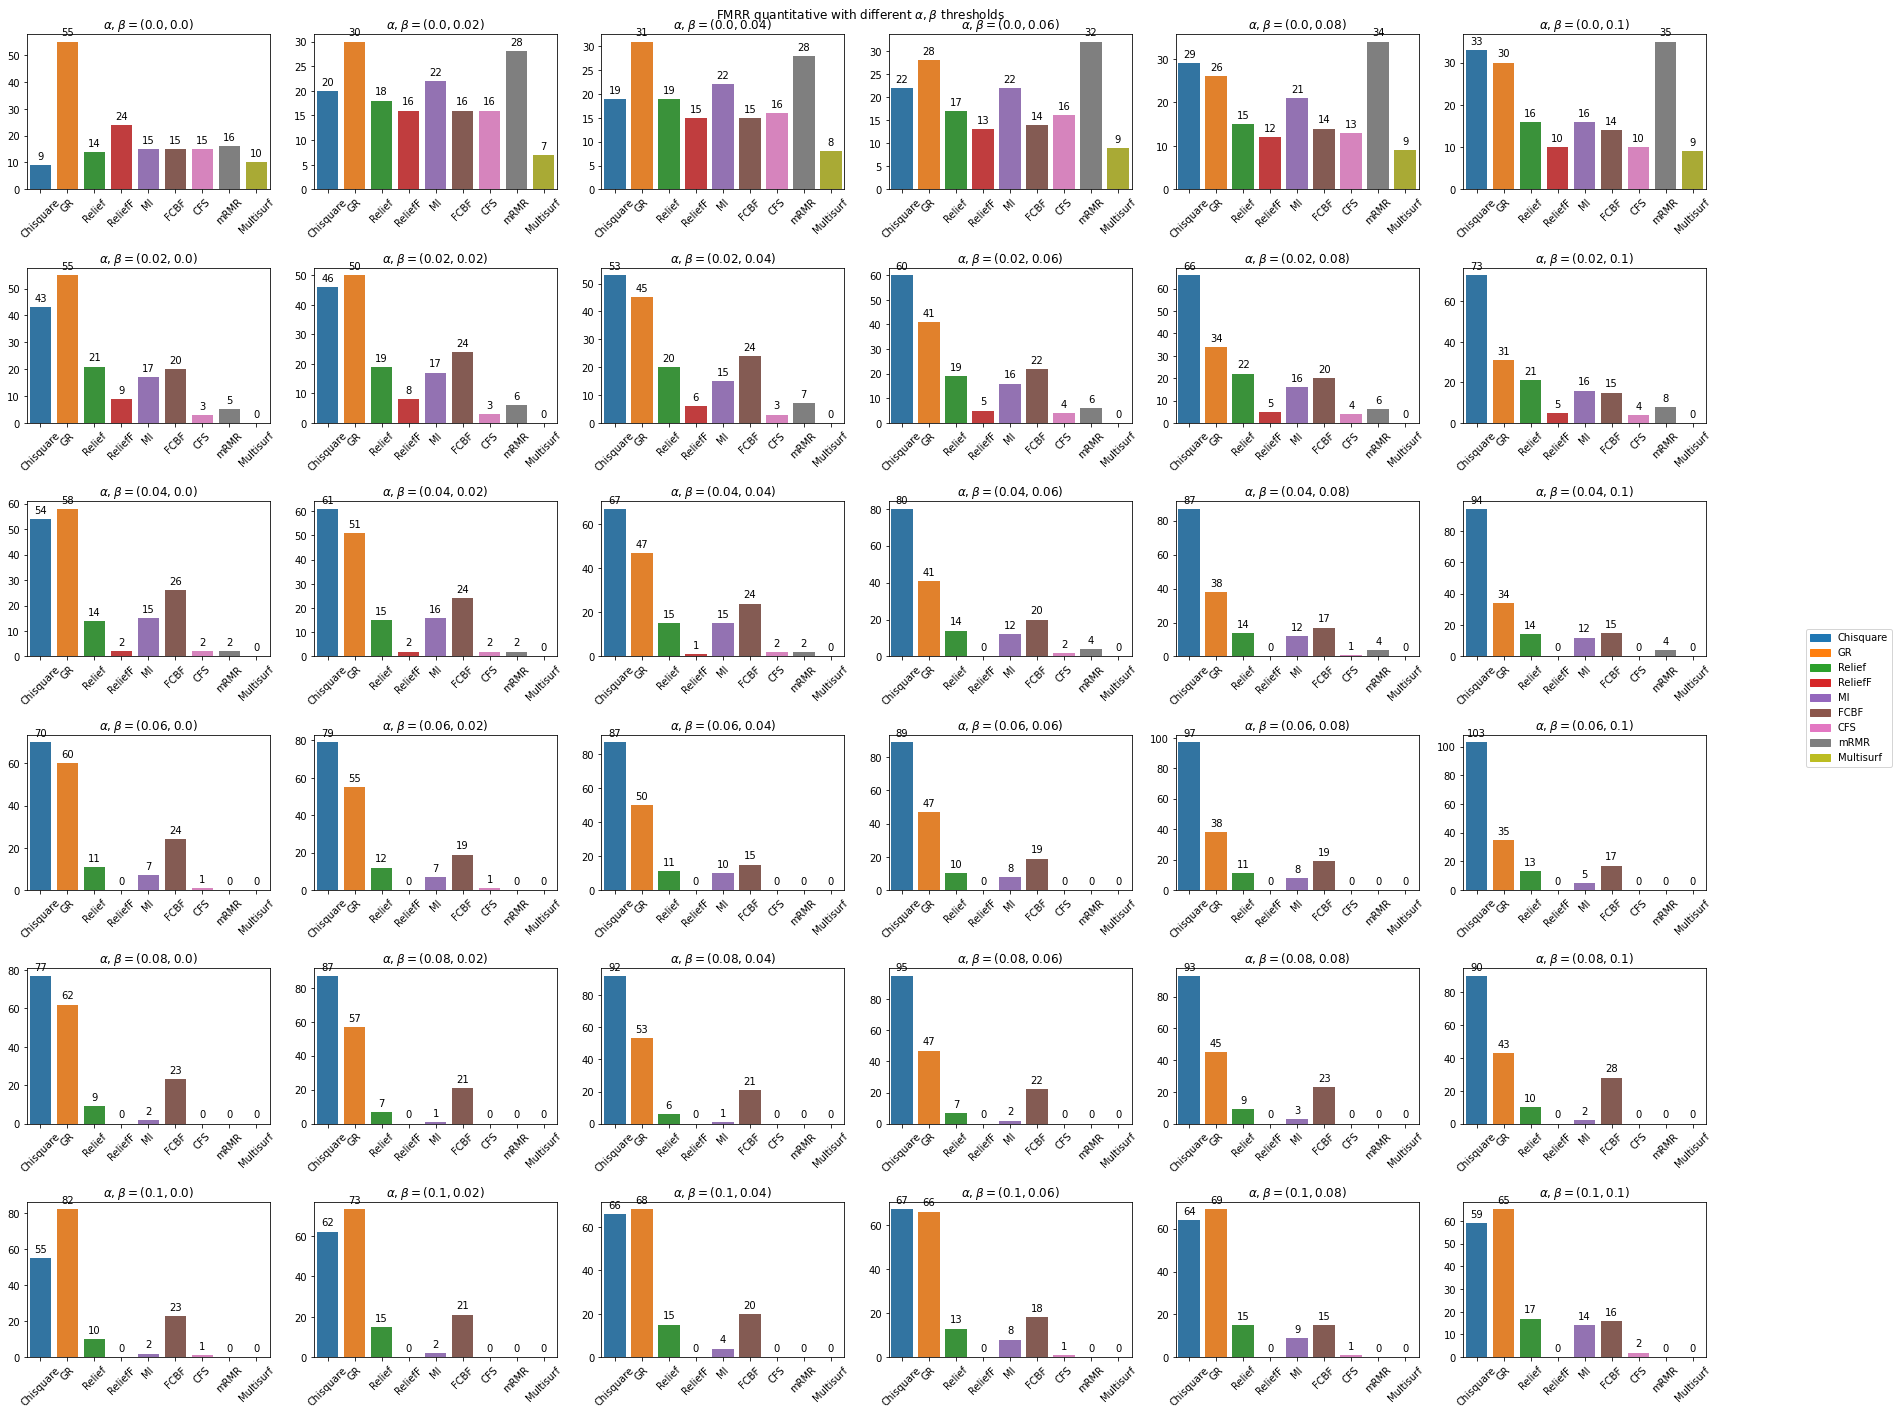

Sorted by alpha, then beta:
   alpha  beta  Chisquare  GR  Relief  ReliefF  MI  FCBF  CFS  mRMR  Multisurf
0    0.0  0.00          9  55      14       24  15    15   15    16         10
1    0.0  0.02         20  30      18       16  22    16   16    28          7
2    0.0  0.04         19  31      19       15  22    15   16    28          8
3    0.0  0.06         22  28      17       13  22    14   16    32          9
4    0.0  0.08         29  26      15       12  21    14   13    34          9
Sorted by beta, then alpha:
    alpha  beta  Chisquare  GR  Relief  ReliefF  MI  FCBF  CFS  mRMR  \
0    0.00   0.0          9  55      14       24  15    15   15    16   
6    0.02   0.0         43  55      21        9  17    20    3     5   
12   0.04   0.0         54  58      14        2  15    26    2     2   
18   0.06   0.0         70  60      11        0   7    24    1     0   
24   0.08   0.0         77  62       9        0   2    23    0     0   

    Multisurf  
0          10  
6    

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Define the feature selection algorithms and their renaming
feature_algos = [
    'chisquare', 'GR', 'relief', 'relieff', 'MI',
    'fcbf', 'cfs', 'mrmr', 'multisurf'
]
renamed_algos = [
    'Chisquare', 'GR', 'Relief', 'ReliefF', 'MI',
    'FCBF', 'CFS', 'mRMR', 'Multisurf'
]
rename_dict = dict(zip(feature_algos, renamed_algos))

# Define a consistent color palette for feature selection techniques
palette = sns.color_palette("tab10", len(feature_algos))
color_dict = {renamed_algos[i]: palette[i] for i in range(len(feature_algos))}

# Directory containing files
abs_path = "/home/d19125691/Documents/Experiments/ontologyDCQ/FeatureSelectionRecommendation/optimalalphabeta/dfmrr_cont"

# Extract alpha and beta values from filenames and sort them
file_info = []
for file in os.listdir(abs_path):
    match = re.findall(r"\d+\.\d+", file)
    if match and len(match) == 2:
        alpha, beta = map(float, match)  # Convert to float
        file_info.append((alpha, beta, file))

# Sort by alpha first, then beta
file_info.sort()

# Prepare figure
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(24, 20), tight_layout=True)
fig.suptitle('FMRR quantitative with different ' + r'$\alpha, \beta$' + ' thresholds')

# Data collection for DataFrame
results = []

# Plot each file in sorted order
for idx, (alpha, beta, file) in enumerate(file_info):
    df = pd.read_csv(os.path.join(abs_path, file))
    df['FeatureAlgo'] = df['FeatureAlgo'].map(rename_dict)  # Rename the algorithms
    value_counts = df['FeatureAlgo'].value_counts().reindex(renamed_algos, fill_value=0)
    
    # Store results for DataFrame
    results.append([alpha, beta] + value_counts.tolist())
    
    # Determine subplot position
    row, col = divmod(idx, 6)
    ax = axes[row][col]
    
    # Plot bar graph
    sns.barplot(ax=ax, x=value_counts.index, y=value_counts.values, palette=[color_dict[algo] for algo in value_counts.index])
    ax.set_title(r'$\alpha, \beta = ({}, {})$'.format(alpha, beta))
    ax.set_xticklabels(labels=value_counts.index, rotation=45)
    
    # Add value annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.4)

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(renamed_algos))]
labels = renamed_algos
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

# Convert results into a DataFrame
df_results = pd.DataFrame(results, columns=['alpha', 'beta'] + renamed_algos)
print("Sorted by alpha, then beta:")
print(df_results.head())

# Sort by beta first, then alpha
df_results_beta_first = df_results.sort_values(by=['beta', 'alpha'])
print("Sorted by beta, then alpha:")
print(df_results_beta_first.head())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
df_earr = pd.read_csv("./optimalalphabeta/dearr_cont/dearr0.0_0.0.csv")
df_fmrr = pd.read_csv("./optimalalphabeta/dfmrr_cont/dfmrr0.0_0.0.csv")
df_fwrr = pd.read_csv("./optimalalphabeta/dfwrr_cont/dfwrr0.0_0.0.csv")


df_earr1 = pd.read_csv("./optimalalphabeta/dearr_cont/dearr0.1_0.1.csv")
df_fmrr1 = pd.read_csv("./optimalalphabeta/dfmrr_cont/dfmrr0.1_0.1.csv")
df_fwrr1 = pd.read_csv("./optimalalphabeta//dfwrr_cont/dfwrr0.1_0.1.csv")


df_earr2 = pd.read_csv("./optimalalphabeta//dearr_cont/dearr0.1_0.06.csv")
df_fmrr2 = pd.read_csv("./optimalalphabeta/dfmrr_cont/dfmrr0.1_0.06.csv")
df_fwrr2 = pd.read_csv("./optimalalphabeta/dfwrr_cont/dfwrr0.1_0.06.csv")


# Define the feature selection algorithms and their renaming
original_algos = ['chisquare', 'GR', 'relief', 'relieff', 'MI', 'fcbf', 'cfs', 'mrmr', 'multisurf']
renamed_algos = ['Chisquare', 'GR', 'Relief', 'ReliefF', 'MI', 'FCBF', 'CFS', 'mRMR', 'Multisurf']
rename_dict = dict(zip(original_algos, renamed_algos))


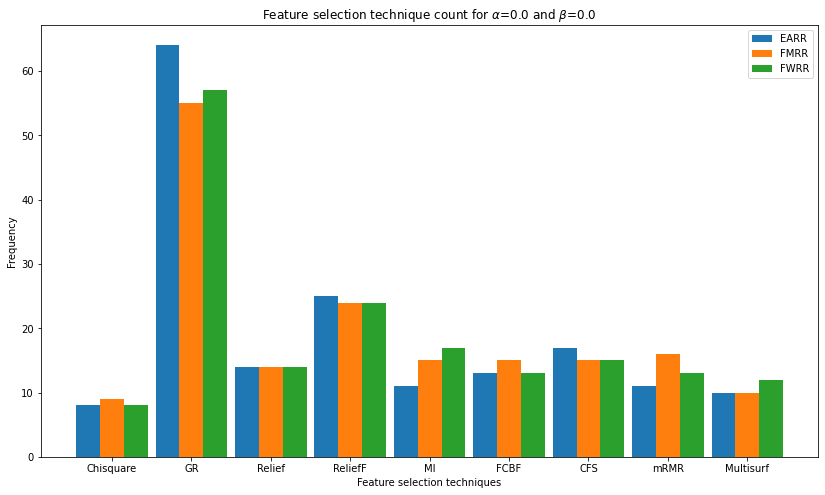

In [6]:
original_algos = ['chisquare', 'GR', 'relief', 'relieff', 'MI', 'fcbf', 'cfs', 'mrmr', 'multisurf']
renamed_algos = ['Chisquare', 'GR', 'Relief', 'ReliefF', 'MI', 'FCBF', 'CFS', 'mRMR', 'Multisurf']
rename_dict = dict(zip(original_algos, renamed_algos))

c1 = df_earr['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0)
c2 = df_fmrr['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0)
c3 = df_fwrr['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0)

X = renamed_algos
X_axis = np.arange(len(X))

plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.3, c1, 0.3, label='EARR')
plt.bar(X_axis, c2, 0.3, label='FMRR')
plt.bar(X_axis + 0.3, c3, 0.3, label='FWRR')

plt.xticks(X_axis, X)
plt.xlabel("Feature selection techniques")
plt.ylabel("Frequency")
plt.title("Feature selection technique count for " + r'$\alpha$' + "=0.0 and " + r'$\beta$' + "=0.0")
plt.legend()

plt.subplots_adjust(left=0.05, bottom=0.15, right=0.95, top=0.9, wspace=0.3, hspace=0.4)

plt.show()

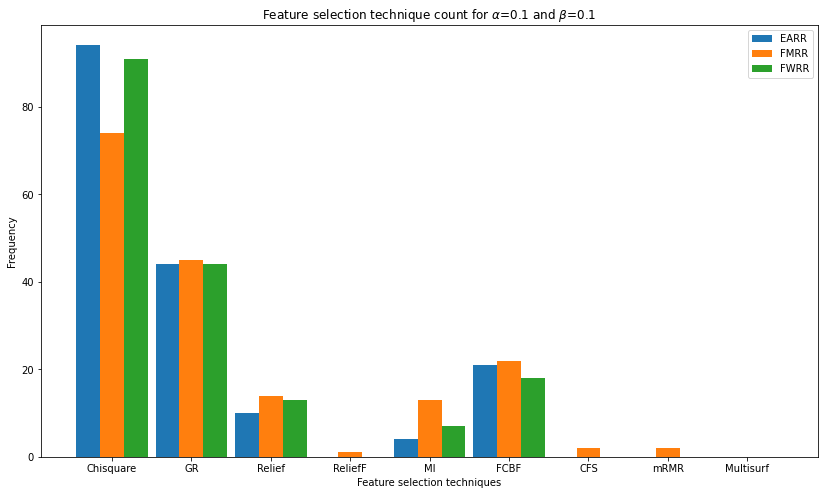

In [7]:
c1 = df_earr1['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0)
c2 = df_fmrr1['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0)
c3 = df_fwrr1['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0)

X = renamed_algos
X_axis = np.arange(len(X))

# Bar plot
plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.3, c1, 0.3, label='EARR')
plt.bar(X_axis, c2, 0.3, label='FMRR')
plt.bar(X_axis + 0.3, c3, 0.3, label='FWRR')

# Adding xticks
plt.xticks(X_axis, X)
plt.xlabel("Feature selection techniques")
plt.ylabel("Frequency")
plt.title("Feature selection technique count for " + r'$\alpha$' + "=0.1 and " + r'$\beta$' + "=0.1")
plt.legend()

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.15, right=0.95, top=0.9, wspace=0.3, hspace=0.4)

plt.show()

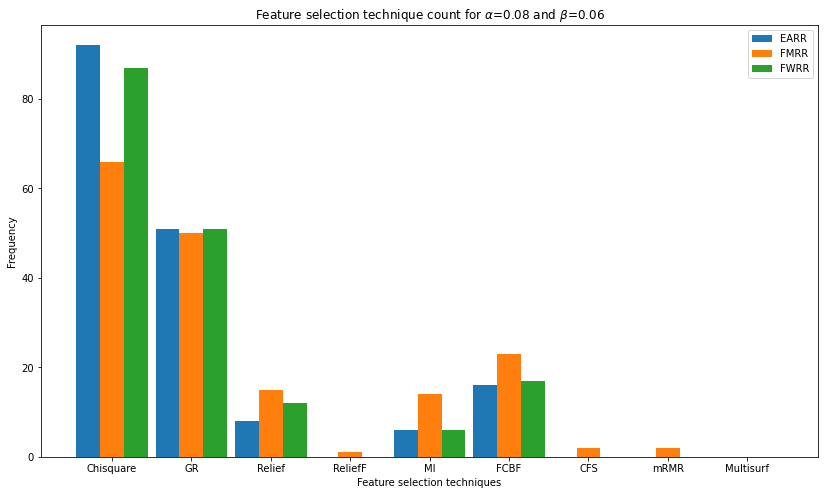

In [8]:
c1 = df_earr2['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0)
c2 = df_fmrr2['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0)
c3 = df_fwrr2['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0)

# X-axis labels
X = renamed_algos
X_axis = np.arange(len(X))

# Bar plot
plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.3, c1, 0.3, label='EARR')
plt.bar(X_axis, c2, 0.3, label='FMRR')
plt.bar(X_axis + 0.3, c3, 0.3, label='FWRR')

# Adding xticks
plt.xticks(X_axis, X)
plt.xlabel("Feature selection techniques")
plt.ylabel("Frequency")
plt.title("Feature selection technique count for " + r'$\alpha$' + "=0.1 and " + r'$\beta$' + "=0.06")
plt.legend()

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.15, right=0.95, top=0.9, wspace=0.3, hspace=0.4)

plt.show()